In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv("possum.csv")
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


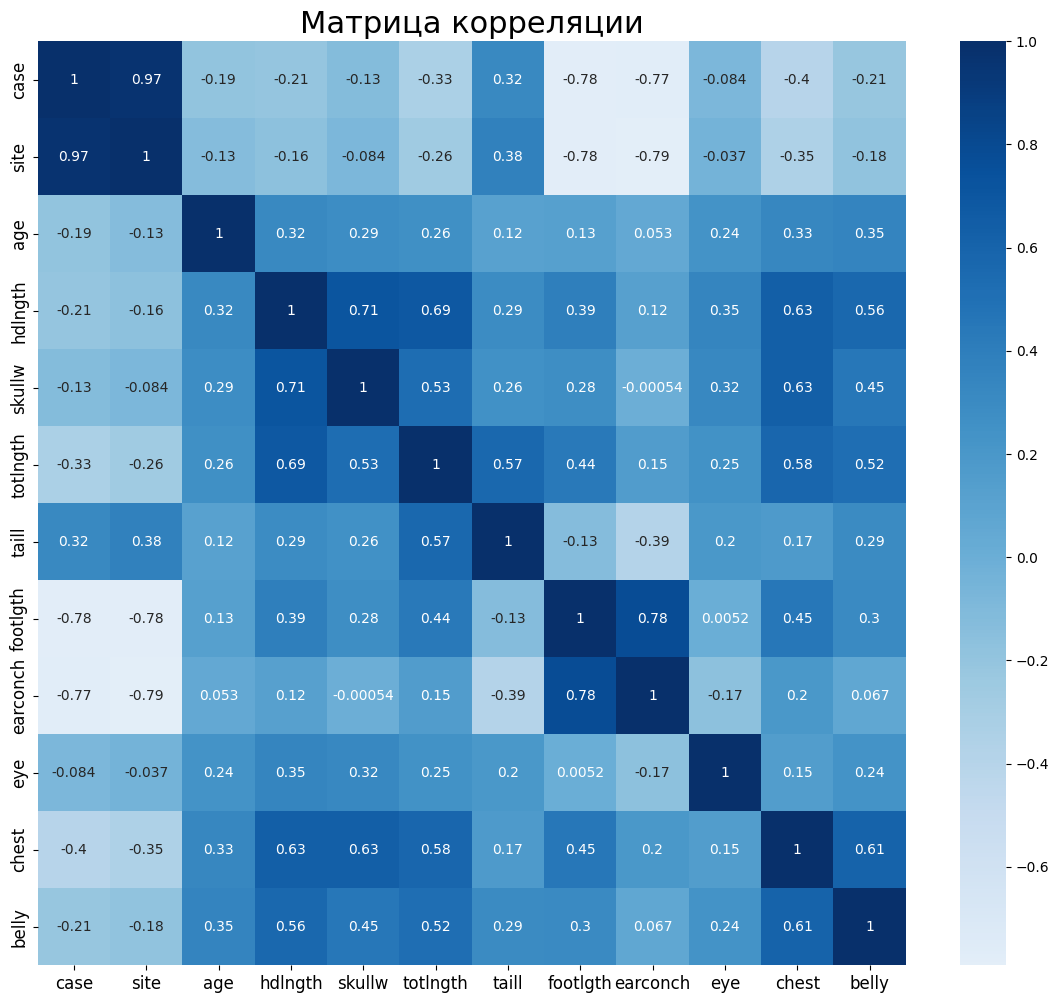

In [23]:
plt.figure(figsize=(14,12))
a = df.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Blues', center=0, annot=True)
plt.title("Матрица корреляции", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Axes: xlabel='totlngth', ylabel='hdlngth'>

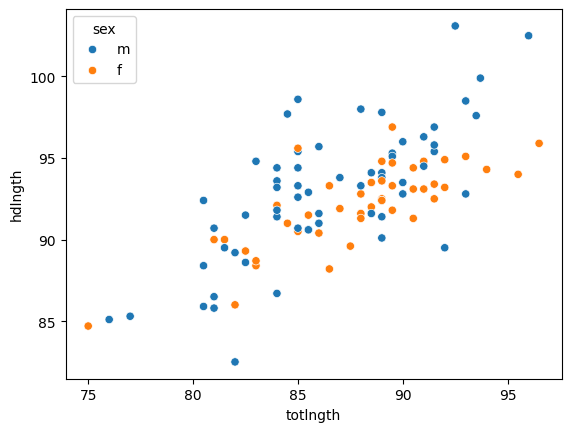

In [24]:
sns.scatterplot(data=df, x="totlngth", y="hdlngth", hue="sex")

In [25]:
df.isna().sum()

,0
case,0
site,0
Pop,0
sex,0
age,2
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,1


In [26]:
df["footlgth"].fillna(df["footlgth"].mean(), inplace=True)
df["age"].fillna(df["age"].mode()[0], inplace=True)
df.isna().sum()

<ipython-input-26-5f13778b9269>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["footlgth"].fillna(df["footlgth"].mean(), inplace=True)
<ipython-input-26-5f13778b9269>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,0
case,0
site,0
Pop,0
sex,0
age,0
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,0


In [118]:
df["Pop"].value_counts()

,count
Pop,
2,58
1,46


In [27]:
df["Pop"].replace("Vic", 1, inplace=True)
df["Pop"].replace("other", 2, inplace=True)
df["sex"].replace("m", 1, inplace=True)
df["sex"].replace("f", 2, inplace=True)

<ipython-input-27-c8273a668438>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Pop"].replace("Vic", 1, inplace=True)
<ipython-input-27-c8273a668438>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [106]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([df.loc[:, "Pop":"skullw"], df.loc[:, "taill":"footlgth"], df.loc[:, "chest":"belly"]], axis=1) , df["totlngth"], test_size=0.3)
lig_reg = LinearRegression()
lig_reg.fit(X_train, y_train)

LinearRegression()

In [107]:
w0 = lig_reg.intercept_
w0

-8.874457222261185

In [108]:
w1 = lig_reg.coef_
w1

array([-2.64583008,  1.16835463, -0.22416547,  0.52108862, -0.07383709,
        1.17361806,  0.04779818,  0.27678666,  0.03851288])

In [109]:
y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1.9678303571947793
Mean Squared Error: 6.018524369136741
R2 score: 0.7720309890717837


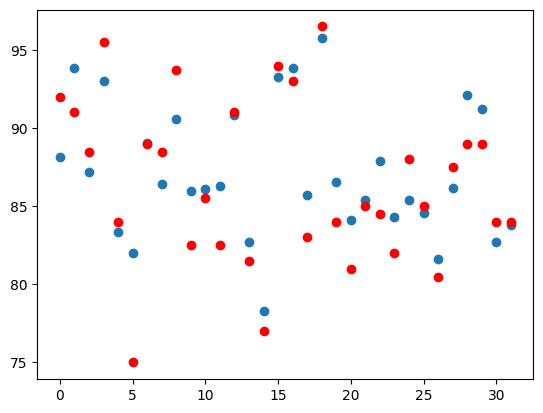

In [110]:
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_pred)), y_test, c="red")

С СТАНДАРТИЗАЦИЕЙ:

In [111]:
std = StandardScaler()

X_std = std.fit_transform(X_train)

std.fit(X_train)
X_std = std.transform(X_train)
X_std2 = std.transform(X_test)

X_std2 = pd.DataFrame(X_std2, columns=["Pop",	"sex",	"age",	"hdlngth",	"skullw",	"taill",	"footlgth",	"chest",	"belly"])
X_std = pd.DataFrame(X_std, columns=["Pop",	"sex",	"age",	"hdlngth",	"skullw",	"taill",	"footlgth",	"chest",	"belly"])
X_std

,Pop,sex,age,hdlngth,skullw,taill,footlgth,chest,belly
0,-1.118034,1.217686,1.003791,-0.317322,0.341482,0.304289,0.563792,0.156455,-0.271930
1,0.894427,-0.821230,-1.032066,2.700765,1.908762,1.640190,1.103029,2.360435,1.310207
2,-1.118034,1.217686,0.494826,-1.276340,0.014965,-0.230072,-0.008450,-0.088431,-0.865231
3,-1.118034,-0.821230,-0.523102,0.698109,0.210875,-0.497252,1.360926,0.401342,-0.469697
4,0.894427,-0.821230,-0.523102,-0.542974,-1.258450,0.571469,-1.100810,-1.067978,-0.469697
...,...,...,...,...,...,...,...,...,...
67,-1.118034,-0.821230,-0.014138,-0.373735,-0.311551,-1.298793,1.056139,0.401342,-0.271930
68,0.894427,-0.821230,-1.541031,-2.009707,-2.270652,-0.230072,-1.335261,-2.537298,-1.656300
69,0.894427,-0.821230,-0.014138,0.528870,-0.409506,0.571469,-0.467792,-1.067978,0.123604
70,0.894427,1.217686,1.003791,-0.148084,-0.638068,0.571469,-1.171145,-1.067978,-1.062998


In [112]:
lig_reg2 = LinearRegression()
lig_reg2.fit(X_std, y_train)

LinearRegression()

In [113]:
w0 = lig_reg2.intercept_
w0

87.36111111111113

In [114]:
w1 = lig_reg2.coef_
w1

array([-1.31472354,  0.57302743, -0.44043464,  1.84741144, -0.22613572,
        2.1963038 ,  0.20387277,  0.56513225,  0.09736927])

In [115]:
y_pred2 = lig_reg2.predict(X_std2)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2))
print('R2 score:', r2_score(y_test, y_pred2))

Mean Absolute Error: 1.9678303571947815
Mean Squared Error: 6.018524369136754
R2 score: 0.7720309890717831


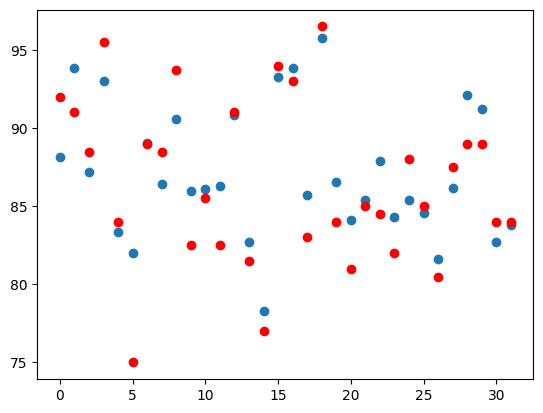

In [116]:
plt.scatter(range(len(y_pred2)), y_pred2)
plt.scatter(range(len(y_pred2)), y_test, c="red")

In [117]:
r2_score(y_test, y_pred)/r2_score(y_test, y_pred2)

1.0000000000000007

В данной задаче нет разницы от приминения стандартизации данных